# Chapter 4 Vector Space of Polynomials

In [ ]:
# numerical and scientific computing libraries
import numpy as np 
import scipy as sp

# plotting libraries\sqrtsa{}
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# for pretty printing
np.set_printoptions(4, linewidth=100, suppress=True)

Let us consider the vector space of polynomials
\begin{align*}
\mathbb{P}_n = \left\{p(t) : \text{$p$ is a polynomial of degree $\leq n$} \right\}.
\end{align*}

Keep in mind that, because $\{1, t, \dots, t^n\}$ spans $\mathbb{P}_n$, the dimension of $\mathbb{P}_n$ is $n+1$.

The "natural" inner product in $\mathbb{P}_n$ is defined, as we saw in the lecture note, as
\begin{align*}
\langle f, g \rangle = \int_{-1}^1 f(t) g(t) dt.
\end{align*}

In [3]:
def inner_poly(f, g):
    h = np.polymul(f, g)  # h(t) = f(t) * g(t)
    i = np.polyint(h, 1)  # i(t) is the indefinite integral of h
    return np.polyval(i, 1) - np.polyval(i, -1)

def norm_poly(f):
    norm_sq = inner_poly(f, f)
    return np.sqrt(norm_sq)

f = np.array(   [1, 0])  # f(t) = t
g = np.array([1, 0, 0])  # g(t) = t^2

print("<f, g> =", inner_poly(f, g))
print("|f| =", norm_poly(f))

<f, g> = 0.0
|f| = 0.816496580927726


In [4]:
# sanity check
print((2/3)**.5)

0.816496580927726


Let us fix the "most natural" basis $\mathcal{B} = \{1, t, \dots, t^n\}$ of $\mathbb{P}_n$.
Then, we know that the matrix $A$ representing the inner product is

\begin{align*}
A = \begin{bmatrix}
\langle 1, 1 \rangle & \langle 1, t \rangle & \cdots & \langle 1, t^n \rangle \\
\langle t, 1 \rangle & \langle t, t \rangle & \cdots & \langle t, t^n \rangle \\
\vdots & \vdots & \ddots & \vdots \\
\langle t^n, 1 \rangle & \langle t^n, t \rangle & \cdots & \langle t^n, t^n \rangle
\end{bmatrix}.
\end{align*}
&nbsp;

In other words, for any $f(t) = a_0 + a_1 t + a_2 t^2 + \dots + a_n t^n \in \mathbb{P}_n$ and $g(t) = b_0 + b_1 t + b_2 t^2 + \dots + b_n t^n \in \mathbb{P}_n$, the inner product of $f$ and $g$ is
\begin{align} \tag{*}
\begin{bmatrix} a_0 & a_1 & \dots & a_n \end{bmatrix} A \begin{bmatrix}
b_0 \\
b_1 \\
\vdots \\
b_n
\end{bmatrix}.
\end{align}
&nbsp;

Considering that we can identify vectors in $\mathbb{P}_n$ with $\mathbb{R}^{n+1}$ by the correspondence

\begin{align*}
f(t) = a_0 + a_1 t + a_2 t^2 + \dots + a_n t^n  \quad \longleftrightarrow \quad (a_0, a_1, \dots, a_n) \in \mathbb{R}^{n+1}
\end{align*}

we can also see (*) as a _nonstandard_ inner product given on $\mathbb{R}^{n+1}$.

In [5]:
n = 10
I = np.eye(n+1)
B = I[::-1, :]  # reversing the row order to match the order of the basis

A = np.zeros((n+1, n+1))
for i in range(n+1):
    for j in range(n+1):
        A[i, j] = inner_poly(B[i, :], B[j, :])


In [6]:
A

array([[2.    , 0.    , 0.6667, 0.    , 0.4   , 0.    , 0.2857, 0.    , 0.2222, 0.    , 0.1818],
       [0.    , 0.6667, 0.    , 0.4   , 0.    , 0.2857, 0.    , 0.2222, 0.    , 0.1818, 0.    ],
       [0.6667, 0.    , 0.4   , 0.    , 0.2857, 0.    , 0.2222, 0.    , 0.1818, 0.    , 0.1538],
       [0.    , 0.4   , 0.    , 0.2857, 0.    , 0.2222, 0.    , 0.1818, 0.    , 0.1538, 0.    ],
       [0.4   , 0.    , 0.2857, 0.    , 0.2222, 0.    , 0.1818, 0.    , 0.1538, 0.    , 0.1333],
       [0.    , 0.2857, 0.    , 0.2222, 0.    , 0.1818, 0.    , 0.1538, 0.    , 0.1333, 0.    ],
       [0.2857, 0.    , 0.2222, 0.    , 0.1818, 0.    , 0.1538, 0.    , 0.1333, 0.    , 0.1176],
       [0.    , 0.2222, 0.    , 0.1818, 0.    , 0.1538, 0.    , 0.1333, 0.    , 0.1176, 0.    ],
       [0.2222, 0.    , 0.1818, 0.    , 0.1538, 0.    , 0.1333, 0.    , 0.1176, 0.    , 0.1053],
       [0.    , 0.1818, 0.    , 0.1538, 0.    , 0.1333, 0.    , 0.1176, 0.    , 0.1053, 0.    ],
       [0.1818, 0.    , 0.1538

In [7]:
f = np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0])  # f(t) = 10t^10 + 9t^9 + ... + 2t^2 + t
g = np.array([ 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])  # g(t) =   t^10 + t^8 + ... + t^2 + 1

print("<f, g> =", inner_poly(f, g))

a = f[::-1]  # because the basis is in the order of {1, t, ..., t^n},
b = g[::-1]  # the coefficients should be reversed

print("a.T A b =", a @ A @ b)

<f, g> = 31.08025981586353
a.T A b = 31.08025981586353


----
As we have the inner product defined on $\mathbb{P}_n$, we can apply the Gram-Schmidt procedure on $\mathcal{B}$ to generate an orthonormal basis.

Recall that the Gram-Schmidt procedure:
\begin{align*}
% \mathbf{w}_0 &= \frac{\mathbf{b}_0}{\|\mathbf{b}_0\|} \\[5pt]
\mathbf{v}_i &= \mathbf{b}_i - \left(\langle \mathbf{b}_i, \mathbf{w}_0\rangle \mathbf{w}_0 + \dots + \langle \mathbf{b}_i, \mathbf{w}_{i-1}\rangle \mathbf{w}_{i-1}\right) ,  \\[5pt]
\mathbf{w}_i &= \frac{\mathbf{v}_i}{\|\mathbf{v}_i\|} .
\end{align*}



In [8]:
W = np.zeros((n+1, n+1))  # orthonormal basis vectors will be stored as rows

for i in range(n+1):
    v = np.copy(B[i, :])
    for j in range(i-1):
        v = np.polysub(v, inner_poly(B[i, :], W[j, :]) * W[j, :])

    W[i, :] = v / norm_poly(v)


In [9]:
W

array([[    0.    ,     0.    ,     0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
            0.    ,     0.    ,     0.    ,     0.7071],
       [    0.    ,     0.    ,     0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
            0.    ,     0.    ,     1.2247,     0.    ],
       [    0.    ,     0.    ,     0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
            0.    ,     2.3717,     0.    ,    -0.7906],
       [    0.    ,     0.    ,     0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
            4.6771,     0.    ,    -2.8062,     0.    ],
       [    0.    ,     0.    ,     0.    ,     0.    ,     0.    ,     0.    ,     9.2808,
            0.    ,    -7.955 ,     0.    ,     0.7955],
       [    0.    ,     0.    ,     0.    ,     0.    ,     0.    ,    18.4685,     0.    ,
          -20.5206,     0.    ,     4.3973,     0.    ],
       [    0.    ,     0.    ,     0.    ,     0.    ,    36.8085,     0.    ,   -50.1935,
            0.

Let us write
\begin{align*}
w_0(t) &= 0.7071, \\
w_1(t) &= 1.2247\, t, \\
w_2(t) &= 2.3717\, t^2 - 0.7906, \\
&\vdots
\end{align*}
so that $\{w_0(t), w_1(t), \dots, w_{n}(t)\}$ becomes an orthonormal basis of $\mathbb{P}_n$.

&nbsp;

Given a polynomial $f \in \mathbb{P}_n$, finding the polynomial with degree $\leq 3$ that is "closest" to $f$ is now an easy task, as that polynomial will be a projection of $f$ onto $\operatorname{span}\{w_0, w_1, w_2, w_3\}$. Notice that indeed $\mathbb{P}_3 = \operatorname{span}\{w_0, w_1, w_2, w_3\}$.

In [11]:
def closest_cubic(f, W):
    proj = np.array([0])  # zero polynomial
    for i in range(0, 3+1) :
        proj = np.polyadd(proj, inner_poly(f, W[i, :]) * W[i, :])
    return proj

print("f =", f)
print("The closest polynomial to f with deg <= 3 :", closest_cubic(f, W))

f = [10  9  8  7  6  5  4  3  2  1  0]
The closest polynomial to f with deg <= 3 : [ 0.      0.      0.      0.      0.      0.      0.     24.791  19.8075 -5.1439 -2.4807]


Often the orthonormal basis $\{w_0, w_1, \dots, w_n\}$  is used in a "renormalized" form. Define

\begin{align*}
P_k(t) = \frac{1}{w_k(1)} w_k(t), \qquad k = 0, 1, 2, \dots
\end{align*}

so that each $P_k$ is a multiple of $w_k$ with $P_k(1) = 1$. Then, each of $P_k(t)$ is no longer a unit norm vector, but $\{P_0(t), P_1(t), \dots, P_n(t)\}$ still forms an **orthogonal** basis of $\mathbb{P}_n$.

&nbsp;

The orthogonal polynomials $P_0(t), P_1(t), P_2(t), \dots$ are known as the *Legendre polynomials*.

In [10]:
P = np.copy(W)

for i in range(n+1):
    ev = np.polyval(P[i, :], 1)
    P[i, :] = (1/ev) * P[i, :]

print(P)

[[   0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        1.    ]
 [   0.        0.        0.        0.        0.        0.        0.        0.        0.        1.        0.    ]
 [   0.        0.        0.        0.        0.        0.        0.        0.        1.5       0.       -0.5   ]
 [   0.        0.        0.        0.        0.        0.        0.        2.5       0.       -1.5       0.    ]
 [   0.        0.        0.        0.        0.        0.        4.375     0.       -3.75      0.        0.375 ]
 [   0.        0.        0.        0.        0.        7.875     0.       -8.75      0.        1.875     0.    ]
 [   0.        0.        0.        0.       14.4375    0.      -19.6875    0.        6.5625    0.       -0.3125]
 [   0.        0.        0.       26.8125    0.      -43.3125    0.       19.6875    0.       -2.1875    0.    ]
 [   0.        0.       50.2734    0.      -93.8438    0.       54.1406    0.       -9.8438    0

/var/folders/l8/lymkl51121l6sbfhm685zrqw0000gn/T/ipykernel_92278/455321496.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


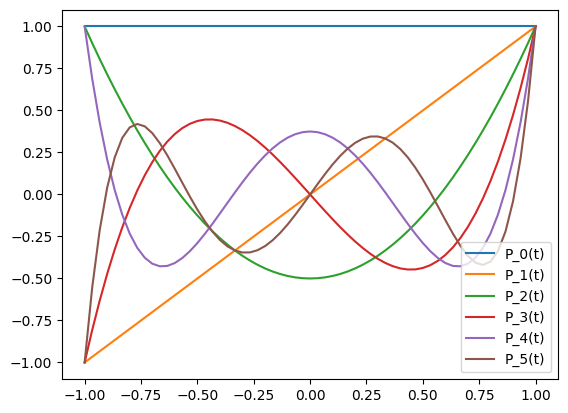

In [11]:
fig, ax = plt.subplots()

plt_x = np.linspace(-1, 1, 61)
for i in range(6):
    plt_y = np.polyval(P[i, :], plt_x)
    ax.plot(plt_x, plt_y, label='P_' + str(i) + '(t)')

ax.legend()
fig.show()